In [1]:
import torchvision
import torch

In [2]:
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=None, target_transform=None, download=True)

In [3]:
display(list(mnist_dataset)[0][0])

In [4]:
from PIL import Image
from torchvision import transforms

<class 'PIL.WebPImagePlugin.WebPImageFile'>


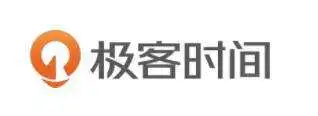

In [5]:
img = Image.open('jk.webp')
print(type(img))
display(img)

##### torchvision.transforms 改变数据格式

In [6]:
img1 = transforms.ToTensor()(img)
type(img1)
img2 = transforms.ToPILImage()(img1)
type(img2)

PIL.Image.Image

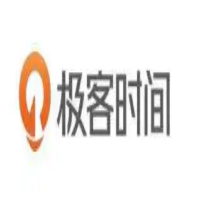

In [7]:
# 自定义宽高
resize_img_oper = transforms.Resize((200,200), interpolation=2)
img3 = resize_img_oper(img)
display(img3)

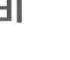

In [8]:
# 定义剪裁操作
center_crop_oper = transforms.CenterCrop((60,70))
random_crop_oper = transforms.RandomCrop((80,80))
five_crop_oper = transforms.FiveCrop((60,70))

img4 = five_crop_oper(img)
display(img4[3])

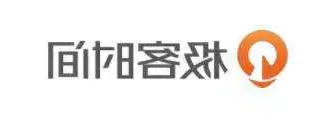

In [9]:
# 翻转
h_flip_oper = transforms.RandomHorizontalFlip(p=1)
v_flip_oper = transforms.RandomVerticalFlip(p=1)

img5 = h_flip_oper(img)
display(img5)

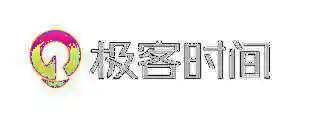

In [10]:
# 标准化
norm_oper = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# 图像转化为Tensor 
img_tensor = transforms.ToTensor()(img)
# 标准化 
tensor_norm = norm_oper(img_tensor)
# Tensor转化为图像 
img_norm = transforms.ToPILImage()(tensor_norm)

display(img_norm)

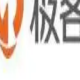

In [11]:
# 组合
# 定义组合操作 
composed = transforms.Compose([transforms.Resize((200, 200)), transforms.RandomCrop(80)])
img6 = composed(img)
display(img6)

In [12]:
import torchvision.models as models

In [13]:
# 加载预训练模型
googlenet = models.googlenet(weights='DEFAULT')

In [14]:
# 提取分类层的输入参数
fc_in_features = googlenet.fc.in_features

# 查看分类层的输出参数
fc_out_features = googlenet.fc.out_features

# 修改预训练模型的输出分类数(在图像分类原理中会具体介绍torch.nn.Linear)
googlenet.fc = torch.nn.Linear(fc_in_features, 10)

In [15]:
from torchvision import datasets
from torch.utils.data import DataLoader

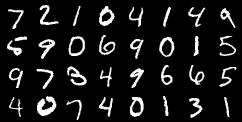

In [25]:
# 加载MNIST数据集
mnist_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

# 取32张图片的tensor
tensor_dataloader = DataLoader(dataset=mnist_dataset, batch_size=32)

data_iter = iter(tensor_dataloader)

img_tensor, label_tensor = next(data_iter)

# 将32张图片拼接在一个网格中
grid_tensor = torchvision.utils.make_grid(img_tensor, nrow=8, padding=2)

grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)

In [27]:
torchvision.utils.save_image(grid_tensor,'grid.jpg')